# DoorDash Dataset Analysis and Model Building

This notebook contains the analysis and machine learning operations performed on the DoorDash dataset.

In [224]:
import pandas as pd

# Load the dataset
file_path = '/content/doordash.csv'
df = pd.read_csv(file_path)

df.head()

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,city_slug,latitude,longitude,...,delivery_fee_raw,delivery_fee,delivery_time_raw,delivery_time,service_fee_raw,service_fee,phone,review_count,review_rating,RunDate
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,NaN,40.675464,-73.980782,...,"$0.00 delivery fee, first order",0.0,24 - 34,29.0,NaN,NaN,NaN,1364,4.8,2022-04-25 07:01:12
3,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,NaN,40.672978,-73.950462,...,"$0.00 delivery fee, first order",0.0,23 - 33,28.0,NaN,NaN,NaN,2000,4.6,2022-04-25 07:01:12
4,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,NaN,40.672978,-73.950462,...,"$0.00 delivery fee, first order",0.0,23 - 33,28.0,NaN,NaN,NaN,2000,4.6,2022-04-25 07:01:12


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   searched_zipcode   11219 non-null  int64  
 1   searched_lat       11219 non-null  float64
 2   searched_lng       11219 non-null  float64
 3   searched_address   11219 non-null  object 
 4   searched_state     11219 non-null  object 
 5   searched_city      11219 non-null  object 
 6   searched_metro     11219 non-null  object 
 7   city_slug          0 non-null      float64
 8   latitude           11219 non-null  float64
 9   longitude          11219 non-null  float64
 10  distance           11219 non-null  float64
 11  loc_name           11219 non-null  object 
 12  loc_number         11219 non-null  int64  
 13  url                11219 non-null  object 
 14  address            11219 non-null  object 
 15  cuisines           11089 non-null  object 
 16  delivery_fee_raw   112

In [226]:
# Dropping text-based columns that may not contribute to the model
columns_to_drop = ['searched_address','url','address','delivery_fee_raw','delivery_time_raw','RunDate','phone','city_slug','service_fee_raw','service_fee','loc_number']
df.drop(columns=columns_to_drop, inplace=True)

In [227]:
df['loc_name'].value_counts()

McDonald's                     35
Walgreens                      32
Burger King                    32
CVS                            31
Subway                         29
                               ..
Taquitos Chicago                1
Wingstop Unlimited              1
People's Vegan Burgers          1
Pressed Up Paninis              1
Affairs to Remember Florist     1
Name: loc_name, Length: 3560, dtype: int64

In [228]:
loc_name_counts = df['loc_name'].value_counts()
unique_loc_names = loc_name_counts[loc_name_counts == 1]

In [229]:
num_unique_loc_names = len(unique_loc_names)
unique_loc_names_sample = unique_loc_names.sample(5, random_state=42) if num_unique_loc_names > 5 else unique_loc_names
num_unique_loc_names, unique_loc_names_sample

(185,
 Cloud9                       1
 Cappa's Trackside Kitchen    1
 Mikomi Sushi                 1
 Sotta                        1
 Stillwater                   1
 Name: loc_name, dtype: int64)

In [230]:
# Filtering the locations that appear at least 3 times
locations_min_3_entries = df['loc_name'].value_counts()[df['loc_name'].value_counts() >= 3]

# Calculating the number of samples with locations that appear at least 3 times
num_samples_min_3_entries = locations_min_3_entries.sum()
num_samples_min_3_entries

10388

In [231]:

# Filtering the dataset to include only the locations that appear at least 3 times
df = df[df['loc_name'].isin(locations_min_3_entries.index)]

# Displaying the first few rows of the filtered dataset
df.head()

,searched_zipcode,searched_lat,searched_lng,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,cuisines,delivery_fee,delivery_time,review_count,review_rating
0,10003,40.732473,-73.987380,NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,0.0,29.0,1364,4.8
1,11219,40.631075,-73.997695,NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,0.0,29.0,1364,4.8
2,11216,40.678832,-73.950677,NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,0.0,29.0,1364,4.8
3,11219,40.631075,-73.997695,NY,Brooklyn,NY,40.672978,-73.950462,0.404577,Taqueria Milear,Mexican|Tacos|Burritos|Dessert|Brunch,0.0,28.0,2000,4.6
4,10003,40.732473,-73.987380,NY,New York,NY,40.672978,-73.950462,0.404577,Taqueria Milear,Mexican|Tacos|Burritos|Dessert|Brunch,0.0,28.0,2000,4.6


In [232]:
df['cuisines'][563]

'Caribbean|Seafood|Salads|Curry'

In [233]:
df['searched_state'].unique()

array(['NY', 'NJ', 'CA', 'IL', 'MA'], dtype=object)

In [234]:
df['searched_city'].unique()

array(['New York', 'Brooklyn', 'Jersey City', 'Weehawken',
       'Staten Island', 'Astoria', 'Los Angeles', 'Glendale', 'Burbank',
       'Irvine', 'Anaheim', 'West Covina', 'Chicago', 'Torrance',
       'Manhattan Beach', 'La Grange', 'Glenview', 'Park Ridge', 'Boston',
       'Dorchester', 'Charlestown', 'Cambridge', 'Belmont', 'Revere',
       'Melrose'], dtype=object)

In [235]:
# Avg review per city
review_counts_by_city = df.groupby('searched_city')['review_rating'].mean()
review_counts_by_city

searched_city
Anaheim            4.203150
Astoria            3.377215
Belmont            4.475862
Boston             4.223961
Brooklyn           3.654055
Burbank            3.648881
Cambridge          4.111559
Charlestown        4.111559
Chicago            3.996109
Dorchester         4.331447
Glendale           3.658242
Glenview           4.100000
Irvine             4.203150
Jersey City        4.091848
La Grange          3.377215
Los Angeles        3.548961
Manhattan Beach    4.295067
Melrose            4.433333
New York           3.652458
Park Ridge         4.075936
Revere             4.483333
Staten Island      4.087088
Torrance           4.274888
Weehawken          4.091553
West Covina        4.218750
Name: review_rating, dtype: float64

In [236]:
# Number of Reviews for City
review_counts_by_city = df.groupby('searched_city')['review_count'].sum()
review_counts_by_city

searched_city
Anaheim             64116
Astoria             36762
Belmont             11719
Boston             276062
Brooklyn           757983
Burbank             71852
Cambridge          130959
Charlestown        132440
Chicago            737853
Dorchester          64576
Glendale            75975
Glenview            76298
Irvine              64116
Jersey City        120798
La Grange           40257
Los Angeles        155591
Manhattan Beach    148346
Melrose              5791
New York           379465
Park Ridge          74913
Revere              11722
Staten Island      118812
Torrance           147701
Weehawken          120756
West Covina         58078
Name: review_count, dtype: int64

In [237]:
# Total Reviews per state
review_counts_by_state = df.groupby('searched_state')['review_rating'].sum()
review_counts_by_state

searched_state
CA     7032.0
IL     8672.9
MA     7128.2
NJ     3007.4
NY    14669.7
Name: review_rating, dtype: float64

In [238]:
# Average review per state
avg_review_by_state = df.groupby('searched_state')['review_rating'].mean()
avg_review_by_state

searched_state
CA    3.902331
IL    3.989374
MA    4.195527
NJ    4.091701
NY    3.687707
Name: review_rating, dtype: float64

In [239]:
# Average delivery time per state
avg_delivery_by_state = df.groupby('searched_state')['delivery_time'].mean()
avg_delivery_by_state

searched_state
CA    32.604329
IL    40.778749
MA    39.586227
NJ    40.451701
NY    81.981649
Name: delivery_time, dtype: float64

In [240]:
# Average delivery time per city
review_counts_by_state = df.groupby('searched_city')['delivery_time'].mean()
review_counts_by_state

searched_city
Anaheim            32.409449
Astoria            27.797468
Belmont            25.896552
Boston             40.261773
Brooklyn           87.510828
Burbank            32.932836
Cambridge          39.911290
Charlestown        39.935484
Chicago            41.842044
Dorchester         41.044025
Glendale           34.575092
Glenview           35.854839
Irvine             32.409449
Jersey City        40.440217
La Grange          41.000000
Los Angeles        31.106236
Manhattan Beach    32.322870
Melrose            28.800000
New York           87.390678
Park Ridge         35.791444
Revere             25.866667
Staten Island      40.434066
Torrance           32.354260
Weehawken          40.463215
West Covina        34.093750
Name: delivery_time, dtype: float64

In [241]:
# Calculating the average review rating for each city
average_review_rating_by_city = df.groupby('searched_city')['review_rating'].mean().reset_index()

# Merging the average review rating with the original data
filtered_data_with_avg_rating = df.merge(average_review_rating_by_city, on='searched_city', suffixes=('', '_city_avg'))

# Filtering locations that are less frequent and have review_rating above the city's average
locations_above_avg = filtered_data_with_avg_rating[
    (filtered_data_with_avg_rating['review_rating'] > filtered_data_with_avg_rating['review_rating_city_avg'])
]

# Grouping by city and location to get the count of occurrences
locations_above_avg_summary = locations_above_avg.groupby(['searched_city', 'loc_name'])['review_rating'].count().reset_index()

# Renaming columns for clarity
locations_above_avg_summary.rename(columns={'review_rating': 'count'}, inplace=True)

# Sorting by count to get less frequent locations
locations_above_avg_summary = locations_above_avg_summary.sort_values(by='count', ascending=True)

# Displaying the first few rows of the result
locations_above_avg_summary.head()

,searched_city,loc_name,count
0,Anaheim,7-Eleven,1
4192,Manhattan Beach,Hollywood Wraps,1
4191,Manhattan Beach,Healthy Spot,1
4190,Manhattan Beach,Health Nut,1
4189,Manhattan Beach,Gum Tree,1


In [242]:
# Grouping the data by city and location name, calculating the average review rating
top_locations_by_city = df.groupby(['searched_city', 'loc_name'])['review_rating'].mean().reset_index()

# Sorting by city and review rating to get the highest-rated locations
top_locations_by_city = top_locations_by_city.sort_values(by=['searched_city', 'review_rating'], ascending=[True, False])

# Selecting the top 10 locations for each city
top_10_locations_by_city = top_locations_by_city.groupby('searched_city').head(10)

# Displaying the first few rows of the result
top_10_locations_by_city.head()

,searched_city,loc_name,review_rating
5,Anaheim,Aleppo's Kitchen,5.0
12,Anaheim,Bed Bath & Beyond,5.0
29,Anaheim,Danys Pizza & Cakes,5.0
49,Anaheim,Just Food For Dogs,5.0
61,Anaheim,Maui Rose,5.0


In [243]:
# Filtering locations that appear at least 5 times
top_locations_with_min_5_count = top_locations_by_city_with_count[top_locations_by_city_with_count['count'] >= 5]

# Sorting by city and review rating to get the highest-rated locations
top_locations_with_min_5_count = top_locations_with_min_5_count.sort_values(by=['searched_city', 'mean'], ascending=[True, False])

# Selecting the top 10 locations for each city
top_10_locations_with_min_5_count = top_locations_with_min_5_count.groupby('searched_city').head(10)

# Displaying the first few rows of the result
top_10_locations_with_min_5_count

,searched_city,loc_name,mean,count
307,Boston,Burger King,4.240000,5
1043,Brooklyn,Crown Fried Chicken,4.200000,10
3272,Chicago,"Jewel-Osco Beer, Wine & Spirits",4.900000,6
3456,Chicago,PetSmart,4.820000,5
2979,Chicago,Baskin-Robbins,4.585714,7
3121,Chicago,Dunkin',4.560000,5
3715,Chicago,Wingstop,4.500000,5
3116,Chicago,Dollar General,4.460000,5
3578,Chicago,Subway,4.460000,5
3703,Chicago,Walgreens,4.450000,6


In [244]:
# Grouping the data by city and location name, calculating the average review rating and count
top_locations_by_city_with_count = df.groupby(['searched_city', 'loc_name'])['review_rating'].agg(['mean', 'count']).reset_index()

# Filtering locations that appear at least 5 times
top_locations_with_min_4_count = top_locations_by_city_with_count[top_locations_by_city_with_count['count'] >= 4]

# Sorting by city and review rating to get the highest-rated locations
top_locations_with_min_4_count = top_locations_with_min_5_count.sort_values(by=['searched_city', 'mean'], ascending=[True, False])

# Selecting the top 10 locations for each city
top_10_locations_with_min_4_count = top_locations_with_min_5_count.groupby('searched_city').head(10)

# Displaying the first few rows of the result
top_10_locations_with_min_4_count.head()

,searched_city,loc_name,mean,count
307,Boston,Burger King,4.240000,5
1043,Brooklyn,Crown Fried Chicken,4.200000,10
3272,Chicago,"Jewel-Osco Beer, Wine & Spirits",4.900000,6
3456,Chicago,PetSmart,4.820000,5
2979,Chicago,Baskin-Robbins,4.585714,7


In [245]:
top_10_locations_with_min_4_count

,searched_city,loc_name,mean,count
307,Boston,Burger King,4.240000,5
1043,Brooklyn,Crown Fried Chicken,4.200000,10
3272,Chicago,"Jewel-Osco Beer, Wine & Spirits",4.900000,6
3456,Chicago,PetSmart,4.820000,5
2979,Chicago,Baskin-Robbins,4.585714,7
3121,Chicago,Dunkin',4.560000,5
3715,Chicago,Wingstop,4.500000,5
3116,Chicago,Dollar General,4.460000,5
3578,Chicago,Subway,4.460000,5
3703,Chicago,Walgreens,4.450000,6


In [246]:
# Renaming the city's average review rating column for proper merging
average_review_rating_by_city.rename(columns={'review_rating': 'review_rating_city_avg'}, inplace=True)

# Grouping the data by city, calculating the average review rating and count
locations_by_city_with_count = df.groupby(['searched_city', 'loc_name'])['review_rating'].agg(['mean', 'count']).reset_index()

# Merging with the city's average review rating again
locations_with_city_avg = locations_by_city_with_count.merge(average_review_rating_by_city, on='searched_city')

# Filtering locations that meet the criteria (min rating greater than city's average, min count 3)
locations_meeting_criteria = locations_with_city_avg[
    (locations_with_city_avg['mean'] > locations_with_city_avg['review_rating_city_avg']) &
    (locations_with_city_avg['count'] >= 3)
]

# Selecting the top 10 locations for each city
top_10_locations_meeting_criteria = locations_meeting_criteria.groupby('searched_city').head(10)

# Identifying cities that don't have at least 3 samples meeting the given criteria
cities_not_meeting_criteria = set(locations_with_city_avg['searched_city']) - set(locations_meeting_criteria['searched_city'])

top_10_locations_meeting_criteria.head()

,searched_city,loc_name,mean,count,review_rating_city_avg
236,Boston,7-Eleven,4.566667,3,4.223961
241,Boston,Aceituna Grill,4.633333,3,4.223961
270,Boston,B.GOOD,4.800000,3,4.223961
280,Boston,Bed Bath & Beyond,4.733333,3,4.223961
307,Boston,Burger King,4.240000,5,4.223961


In [247]:
list(cities_not_meeting_criteria)

['West Covina',
 'Belmont',
 'Astoria',
 'Dorchester',
 'Weehawken',
 'Jersey City',
 'Burbank',
 'Charlestown',
 'Glenview',
 'Park Ridge',
 'Glendale',
 'La Grange',
 'Torrance',
 'Revere',
 'Irvine',
 'Staten Island',
 'Cambridge',
 'Anaheim',
 'Manhattan Beach',
 'Melrose']

## High Performing Chains

In [248]:
# Recalculating the necessary data for the analysis

# Average review rating for each city
average_review_rating_by_city = df.groupby('searched_city')['review_rating'].mean().reset_index()
average_review_rating_by_city.rename(columns={'review_rating': 'review_rating_city_avg'}, inplace=True)

# Grouping data by city and location name, calculating average review rating and count
locations_by_city_with_count = df.groupby(['searched_city', 'loc_name'])['review_rating'].agg(['mean', 'count']).reset_index()

# Merging with city's average review rating
locations_with_city_avg = locations_by_city_with_count.merge(average_review_rating_by_city, on='searched_city')

# Filtering locations that meet the criteria (min rating greater than city's average, min count 3)
locations_meeting_criteria = locations_with_city_avg[
    (locations_with_city_avg['mean'] > locations_with_city_avg['review_rating_city_avg']) &
    (locations_with_city_avg['count'] >= 3)
]

# Selecting the top 10 locations for each city
top_10_locations_meeting_criteria = locations_meeting_criteria.groupby('searched_city').head(10)

# Identifying chains (locations) that appear frequently in the top 10 across different cities
high_performing_chains = top_10_locations_meeting_criteria['loc_name'].value_counts().reset_index()
high_performing_chains.columns = ['loc_name', 'count_of_cities']

# Selecting chains that appear in the top 10 in at least 3 cities
high_performing_chains_top = high_performing_chains[high_performing_chains['count_of_cities'] >= 2]

high_performing_chains_top.head()

,loc_name,count_of_cities
0,7-Eleven,2
1,Burger King,2
2,Crown Fried Chicken,2


## Underrepresented Chain

In [249]:
# Identifying unique cities and locations
unique_cities = df['searched_city'].unique()
unique_locations = high_performing_chains['loc_name'].unique()

# Analyzing underrepresented chains
underrepresented_chains = []

# Iterating through high-performing chains to find cities where they are not present
for loc_name in unique_locations:
    cities_with_chain = top_10_locations_meeting_criteria[top_10_locations_meeting_criteria['loc_name'] == loc_name]['searched_city'].unique()
    missing_cities = set(unique_cities) - set(cities_with_chain)
    if missing_cities:
        underrepresented_chains.append((loc_name, list(missing_cities)))

# Showing the first few underrepresented chains
underrepresented_chains[:5]

[('7-Eleven',
  ['West Covina',
   'Los Angeles',
   'Belmont',
   'Astoria',
   'Brooklyn',
   'New York',
   'Dorchester',
   'Weehawken',
   'Burbank',
   'Glenview',
   'Charlestown',
   'Park Ridge',
   'Glendale',
   'La Grange',
   'Torrance',
   'Revere',
   'Irvine',
   'Anaheim',
   'Staten Island',
   'Cambridge',
   'Jersey City',
   'Manhattan Beach',
   'Melrose']),
 ('Burger King',
  ['West Covina',
   'Belmont',
   'Astoria',
   'Brooklyn',
   'New York',
   'Dorchester',
   'Weehawken',
   'Chicago',
   'Burbank',
   'Glenview',
   'Charlestown',
   'Park Ridge',
   'Glendale',
   'La Grange',
   'Torrance',
   'Revere',
   'Irvine',
   'Anaheim',
   'Staten Island',
   'Cambridge',
   'Jersey City',
   'Manhattan Beach',
   'Melrose']),
 ('Crown Fried Chicken',
  ['West Covina',
   'Los Angeles',
   'Belmont',
   'Astoria',
   'Dorchester',
   'Weehawken',
   'Chicago',
   'Burbank',
   'Glenview',
   'Charlestown',
   'Park Ridge',
   'Glendale',
   'La Grange',
   '

## Competitive Analysis

In [250]:
# Top 5 competitors for each city
top_5_competitors_by_city = top_10_locations_meeting_criteria.groupby('searched_city').apply(
    lambda x: x.nlargest(5, 'mean')[['loc_name', 'mean', 'count']]
).reset_index()

# Displaying the top 5 competitors for all cities
top_5_competitors_by_city

,searched_city,level_1,loc_name,mean,count
0,Boston,270,B.GOOD,4.800000,3
1,Boston,280,Bed Bath & Beyond,4.733333,3
2,Boston,241,Aceituna Grill,4.633333,3
3,Boston,236,7-Eleven,4.566667,3
4,Boston,316,Caffe Nero,4.533333,3
5,Brooklyn,1350,La Bagel Delight,4.650000,4
6,Brooklyn,871,Bergen Bagels,4.600000,4
7,Brooklyn,1298,Juicy King Crab Express,4.600000,4
8,Brooklyn,1338,Kiwi Food Market,4.450000,4
9,Brooklyn,1043,Crown Fried Chicken,4.200000,10


## Leveraging existing success

In [251]:
# Top 3 competitors for each city
top_3_competitors_by_city = top_10_locations_meeting_criteria.groupby('searched_city').apply(
    lambda x: x.nlargest(3, 'mean')[['loc_name', 'mean', 'count']]
).reset_index()

# Displaying the top 3 competitors for all cities
top_3_competitors_by_city

,searched_city,level_1,loc_name,mean,count
0,Boston,270,B.GOOD,4.800000,3
1,Boston,280,Bed Bath & Beyond,4.733333,3
2,Boston,241,Aceituna Grill,4.633333,3
3,Brooklyn,1350,La Bagel Delight,4.650000,4
4,Brooklyn,871,Bergen Bagels,4.600000,4
5,Brooklyn,1298,Juicy King Crab Express,4.600000,4
6,Chicago,2935,3M Restaurant,5.000000,3
7,Chicago,2951,Alice & Friends' Vegan Kitchen,4.900000,3
8,Chicago,2937,5411 Empanadas,4.800000,3
9,Los Angeles,5095,Little Caesars Pizza,4.633333,3


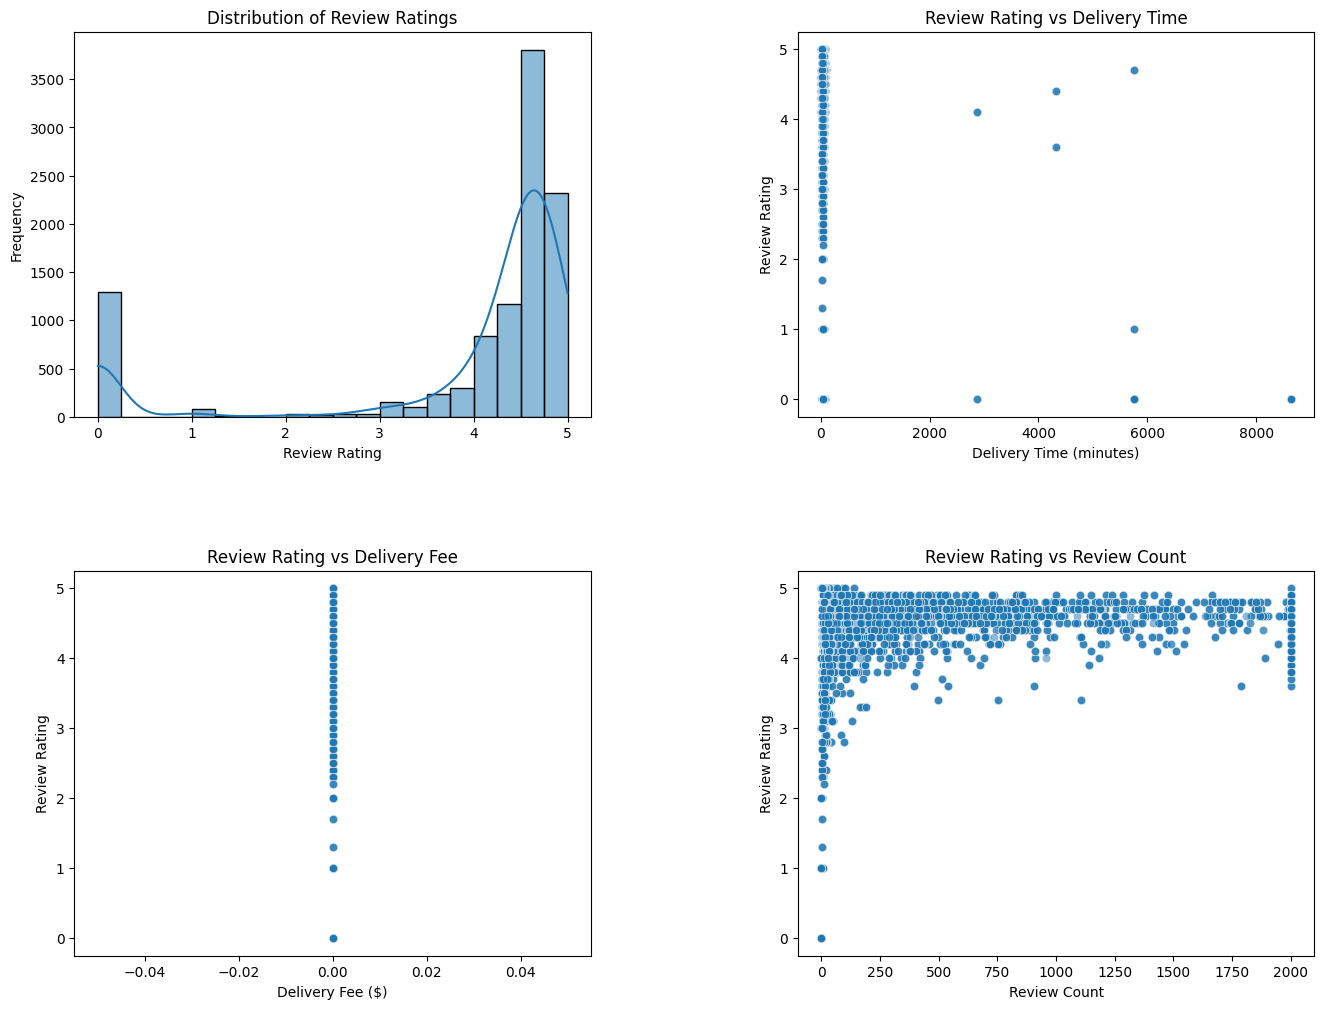

In [252]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plotting the distribution of review ratings
sns.histplot(df['review_rating'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Review Ratings')
axes[0, 0].set_xlabel('Review Rating')
axes[0, 0].set_ylabel('Frequency')

# Plotting the relationship between review rating and delivery time
sns.scatterplot(x='delivery_time', y='review_rating', data=df, ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Review Rating vs Delivery Time')
axes[0, 1].set_xlabel('Delivery Time (minutes)')
axes[0, 1].set_ylabel('Review Rating')

# Plotting the relationship between review rating and delivery fee
sns.scatterplot(x='delivery_fee', y='review_rating', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Review Rating vs Delivery Fee')
axes[1, 0].set_xlabel('Delivery Fee ($)')
axes[1, 0].set_ylabel('Review Rating')

# Plotting the relationship between review rating and review count
sns.scatterplot(x='review_count', y='review_rating', data=df, ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Review Rating vs Review Count')
axes[1, 1].set_xlabel('Review Count')
axes[1, 1].set_ylabel('Review Rating')

plt.show()

#Rating Prediction

<ipython-input-253-909e72565609>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


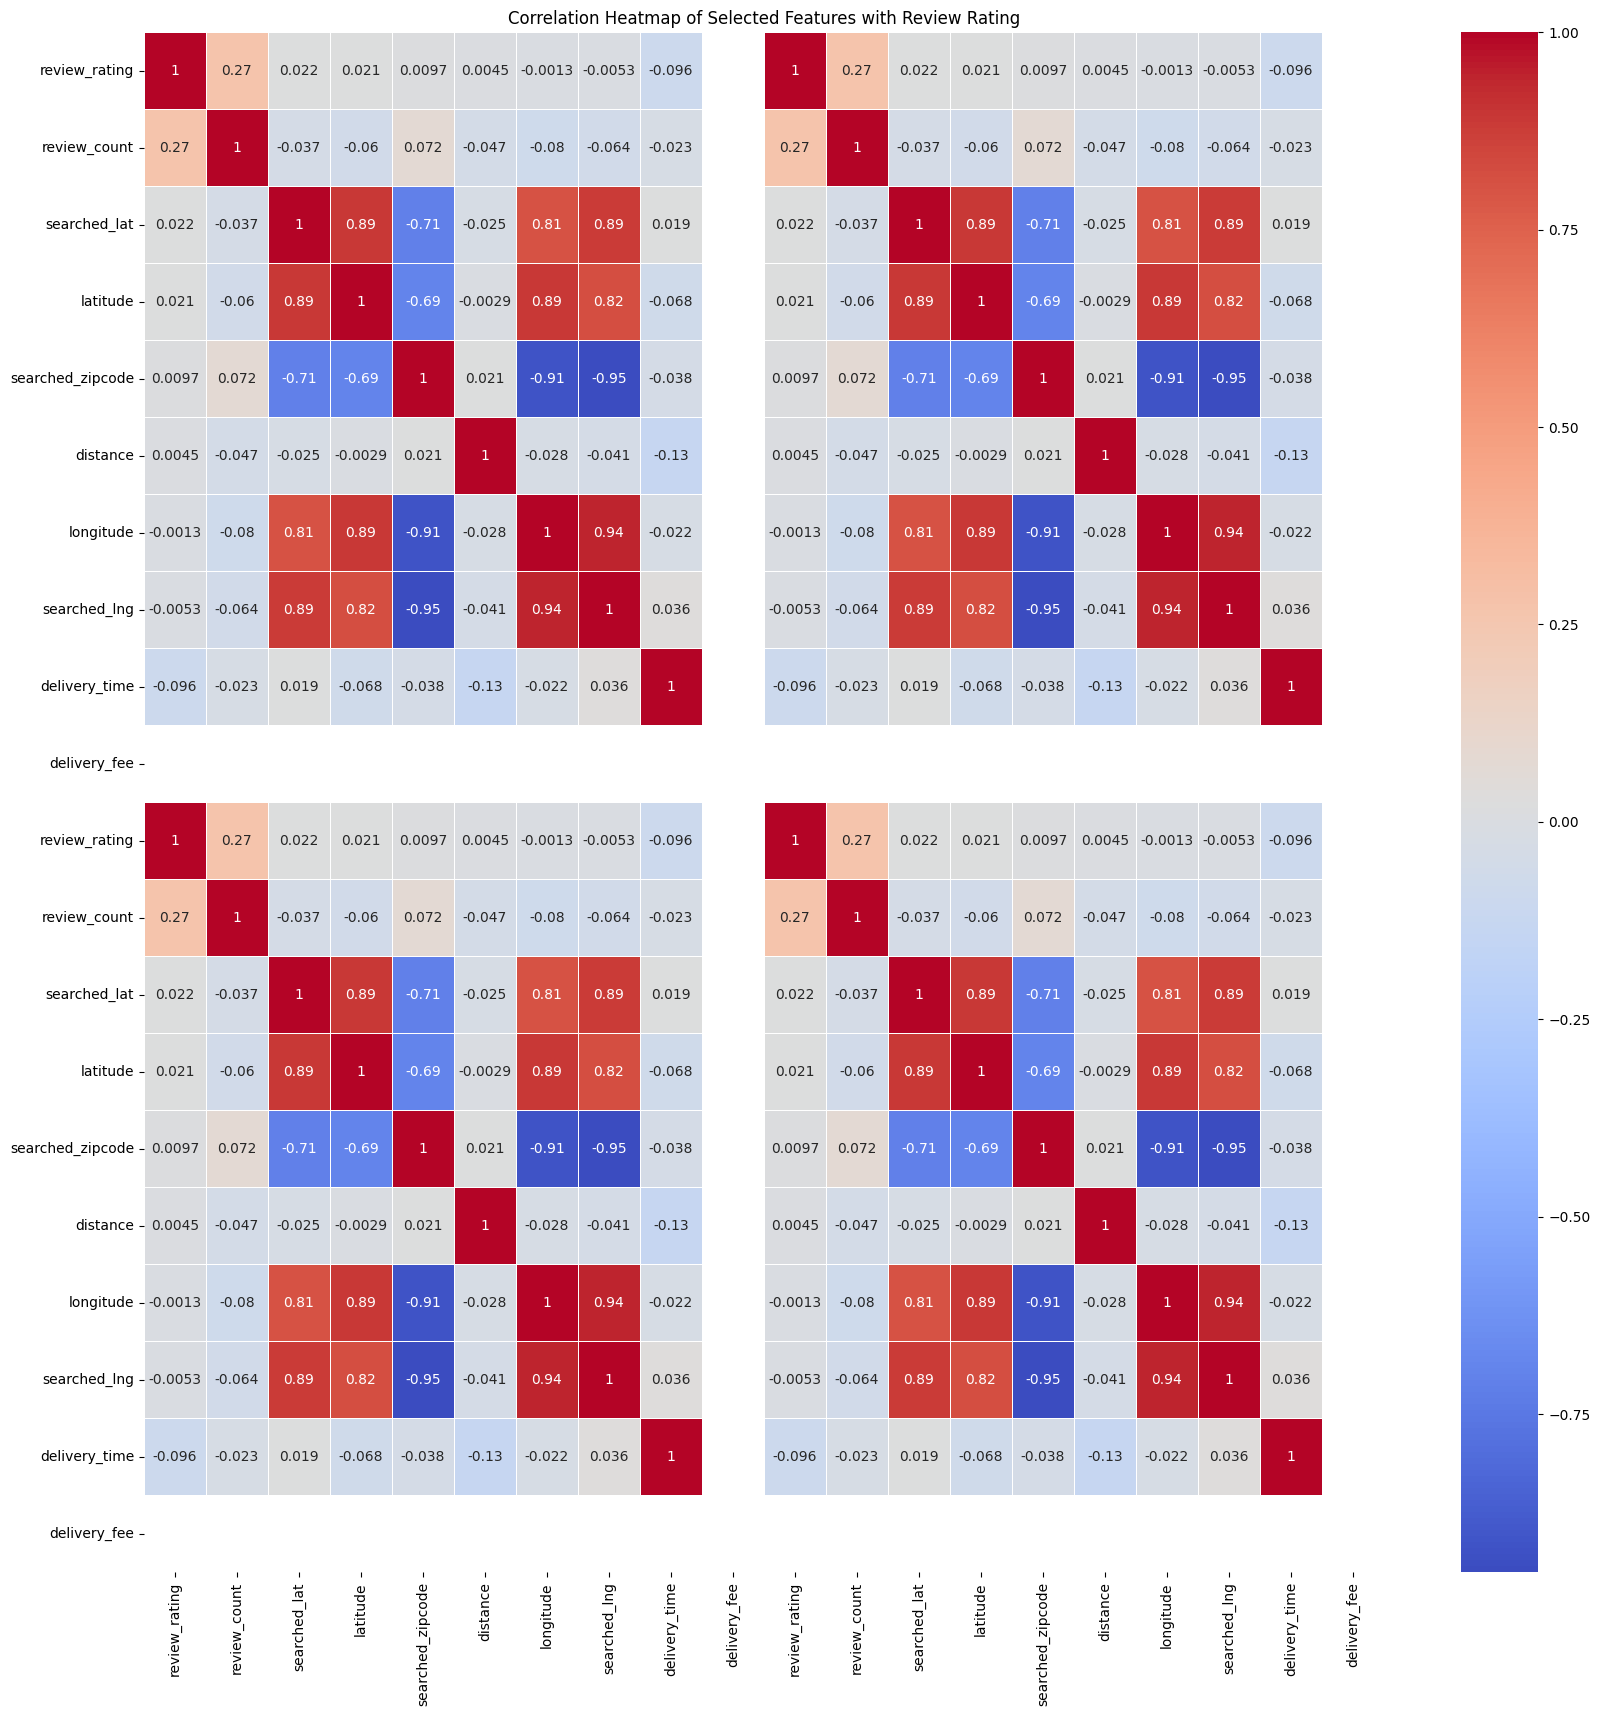

In [253]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Focusing on the correlation with the target variable 'review_rating'
target_correlation = correlation_matrix['review_rating'].sort_values(ascending=False)

# Selecting top 20 positively correlated and top 20 negatively correlated features
top_correlations = pd.concat([target_correlation.head(20), target_correlation.tail(20)])

# Plotting the correlation heatmap for selected features
plt.figure(figsize=(20, 20))
sns.heatmap(df[top_correlations.index].corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Selected Features with Review Rating")
plt.show()

In [254]:
# Handling missing values
# Filling missing values in the 'cuisines' column with a placeholder
df['cuisines'].fillna('Unknown', inplace=True)

# Filling missing values in the 'delivery_fee' column with the median
df['delivery_fee'].fillna(df['delivery_fee'].median(), inplace=True)

# Investigating the outlier in the 'delivery_time' column
delivery_time_outlier_threshold = df['delivery_time'].quantile(0.99) # 99th percentile
df = df[df['delivery_time'] <= delivery_time_outlier_threshold]

# Verifying the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10287 entries, 0 to 11217
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   searched_zipcode  10287 non-null  int64  
 1   searched_lat      10287 non-null  float64
 2   searched_lng      10287 non-null  float64
 3   searched_state    10287 non-null  object 
 4   searched_city     10287 non-null  object 
 5   searched_metro    10287 non-null  object 
 6   latitude          10287 non-null  float64
 7   longitude         10287 non-null  float64
 8   distance          10287 non-null  float64
 9   loc_name          10287 non-null  object 
 10  cuisines          10287 non-null  object 
 11  delivery_fee      10287 non-null  float64
 12  delivery_time     10287 non-null  float64
 13  review_count      10287 non-null  int64  
 14  review_rating     10287 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 1.3+ MB


In [255]:
# Splitting the 'cuisines' column into individual cuisine types and one-hot encoding them
cuisines_encoded = df['cuisines'].str.get_dummies(sep='|')

# Concatenating the one-hot encoded cuisines with the original dataset
#df = pd.concat([df, cuisines_encoded], axis=1)

# Dropping the original 'cuisines' column
df.drop(columns=['cuisines'], inplace=True)

# Verifying the changes
df.head()

,searched_zipcode,searched_lat,searched_lng,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,delivery_fee,delivery_time,review_count,review_rating
0,10003,40.732473,-73.987380,NY,New York,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8
1,11219,40.631075,-73.997695,NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8
2,11216,40.678832,-73.950677,NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8
3,11219,40.631075,-73.997695,NY,Brooklyn,NY,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,4.6
4,10003,40.732473,-73.987380,NY,New York,NY,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,4.6


In [257]:
# Applying binning to 'searched_lat', 'searched_lng', and 'searched_zipcode'
num_bins = 10  # Number of bins

# Binning for latitude and longitude
df['binned_lat'] = pd.cut(df['searched_lat'], bins=num_bins, labels=False)
df['binned_lng'] = pd.cut(df['searched_lng'], bins=num_bins, labels=False)

# Dropping the original 'searched_lat', 'searched_lng', and 'searched_zipcode' columns
df = df.drop(columns=['searched_lat', 'searched_lng'])

# Viewing the first few rows of the dataset after binning
df.head()

,searched_zipcode,latitude,longitude,distance,loc_name,delivery_fee,delivery_time,review_count,review_rating,searched_state_IL,...,searched_city_Revere,searched_city_Staten Island,searched_city_Torrance,searched_city_Weehawken,searched_city_West Covina,searched_metro_CH,searched_metro_LA,searched_metro_NY,binned_lat,binned_lng
0,10003,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8,0,...,0,0,0,0,0,0,0,1,8,9
1,11219,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8,0,...,0,0,0,0,0,0,0,1,7,9
2,11216,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,4.8,0,...,0,0,0,0,0,0,0,1,7,9
3,11219,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,4.6,0,...,0,0,0,0,0,0,0,1,7,9
4,10003,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,4.6,0,...,0,0,0,0,0,0,0,1,8,9


In [260]:
df = df.drop(columns=['loc_name'])

In [256]:
# Encoding categorical variables using one-hot encoding
categorical_columns = ['searched_state', 'searched_city', 'searched_metro']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verifying the changes
df.head()

,searched_zipcode,searched_lat,searched_lng,latitude,longitude,distance,loc_name,delivery_fee,delivery_time,review_count,...,searched_city_New York,searched_city_Park Ridge,searched_city_Revere,searched_city_Staten Island,searched_city_Torrance,searched_city_Weehawken,searched_city_West Covina,searched_metro_CH,searched_metro_LA,searched_metro_NY
0,10003,40.732473,-73.987380,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,...,1,0,0,0,0,0,0,0,0,1
1,11219,40.631075,-73.997695,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,...,0,0,0,0,0,0,0,0,0,1
2,11216,40.678832,-73.950677,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,0.0,29.0,1364,...,0,0,0,0,0,0,0,0,0,1
3,11219,40.631075,-73.997695,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,...,0,0,0,0,0,0,0,0,0,1
4,10003,40.732473,-73.987380,40.672978,-73.950462,0.404577,Taqueria Milear,0.0,28.0,2000,...,1,0,0,0,0,0,0,0,0,1


In [265]:
#Encoding numerical variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ['binned_lat', 'binned_lng','distance', 'delivery_time', 'review_count']
# Applying MinMaxScaler to the newly binned and encoded columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Viewing the first few rows of the dataset after scaling
df.head()

,searched_zipcode,latitude,longitude,distance,delivery_fee,delivery_time,review_count,review_rating,searched_state_IL,searched_state_MA,...,searched_city_Revere,searched_city_Staten Island,searched_city_Torrance,searched_city_Weehawken,searched_city_West Covina,searched_metro_CH,searched_metro_LA,searched_metro_NY,binned_lat,binned_lng
0,10003,40.675464,-73.980782,0.795556,0.0,0.322034,0.682,4.8,0,0,...,0,0,0,0,0,0,0,1,0.888889,1.0
1,11219,40.675464,-73.980782,0.795556,0.0,0.322034,0.682,4.8,0,0,...,0,0,0,0,0,0,0,1,0.777778,1.0
2,11216,40.675464,-73.980782,0.795556,0.0,0.322034,0.682,4.8,0,0,...,0,0,0,0,0,0,0,1,0.777778,1.0
3,11219,40.672978,-73.950462,0.195529,0.0,0.305085,1.000,4.6,0,0,...,0,0,0,0,0,0,0,1,0.777778,1.0
4,10003,40.672978,-73.950462,0.195529,0.0,0.305085,1.000,4.6,0,0,...,0,0,0,0,0,0,0,1,0.888889,1.0


In [261]:
from sklearn.model_selection import train_test_split

# Separating the features and target variable
X = df.drop(columns=['review_rating'])
y = df['review_rating']

# Splitting the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the shapes of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8229, 40), (2058, 40), (8229,), (2058,))

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Predicting the review ratings on the validation set
y_pred = rf_model.predict(X_val)

# Evaluating the model's performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

mae, mse, r2

(0.0987158001295757, 0.03933371858155171, 0.9837653231575525)

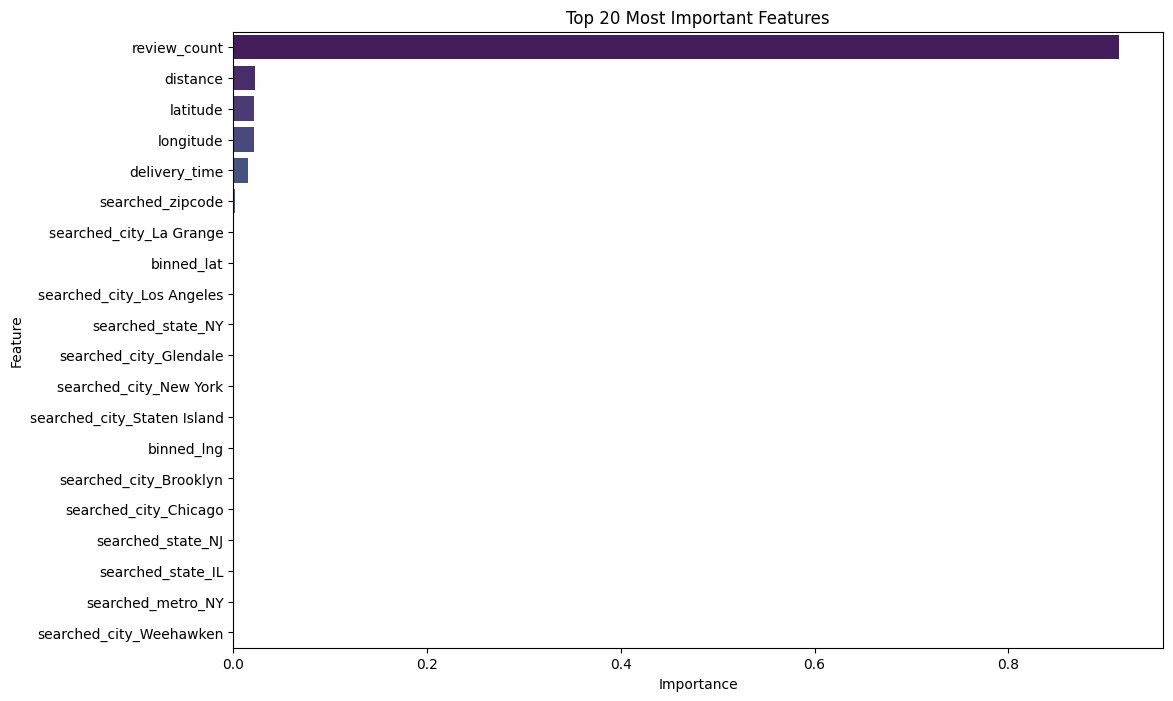

In [268]:
# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to hold the feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Looks like number of ratings is a very dominant feature.